### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, svm, metrics, preprocessing, neighbors
from matplotlib import colors

### Importing the dataset

In [2]:
dataset = pd.read_csv("data/Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Splitting the dataset (training x test sets)

In [3]:
X = dataset[["Age", "EstimatedSalary"]]
y = dataset["Purchased"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

### Feature scaling

In [4]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test[:5]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

### Model training

In [5]:
model = svm.SVC(kernel="rbf", random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

### Predictions

In [6]:
y_predicted = model.predict(X_test)
y_predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### Results data visualization

In [7]:
cm = metrics.confusion_matrix(y_test, y_predicted)
cm

array([[64,  4],
       [ 3, 29]])

In [8]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
accuracy

0.93

/Users/leommartins/Src/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/var/folders/94/cdr1n80n7fxcscjbjwxbbhr54jjq06/T/ipykernel_48622/1742911845.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c=colors.ListedColormap(("salmon", "dodgerblue"))(i), label=j)


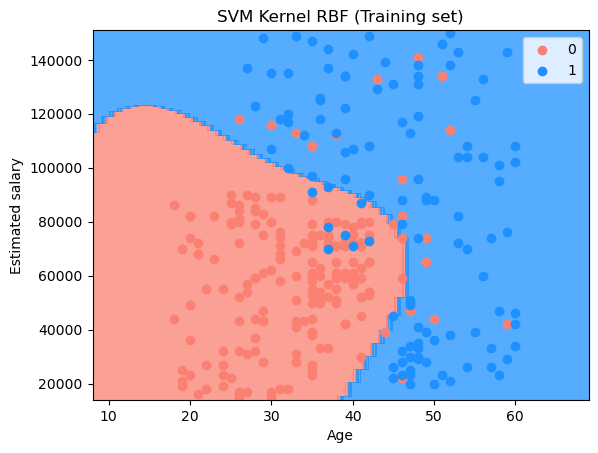

In [9]:
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max()+10, step=1),
                    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha=0.75, cmap=colors.ListedColormap(("salmon", "dodgerblue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c=colors.ListedColormap(("salmon", "dodgerblue"))(i), label=j)
plt.title("SVM Kernel RBF (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.legend()
plt.show()

/Users/leommartins/Src/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/var/folders/94/cdr1n80n7fxcscjbjwxbbhr54jjq06/T/ipykernel_48622/1774856117.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colors.ListedColormap(("salmon", "dodgerblue"))(i), label = j)


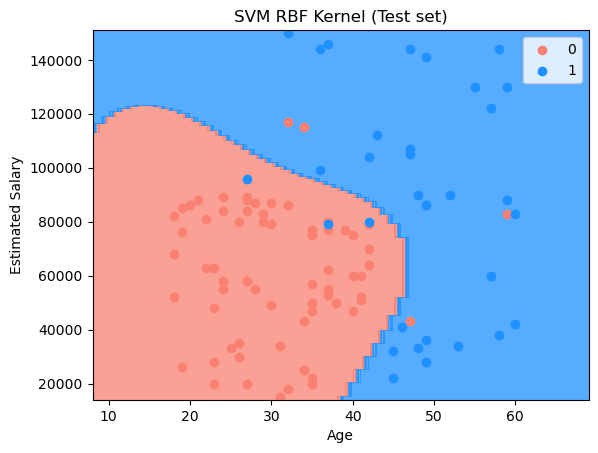

In [10]:
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = colors.ListedColormap(("salmon", "dodgerblue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colors.ListedColormap(("salmon", "dodgerblue"))(i), label = j)
plt.title('SVM RBF Kernel (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()